In [685]:
# Setting up the environment
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import pandas as pd

pd.set_option('display.max_rows', 20)
plt.style.use('seaborn-whitegrid')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 7)

# Importing data
data = pd.read_csv(r'C:\Users\anly3\Downloads\archive\movies.csv')


## Data Cleaning

In [686]:
# Checking for missing values
data.isna().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [687]:
# Dropping null values
new_data = data.dropna()


In [688]:
# Splitting location and date in data.released
new_released = [x.split('(') for x in new_data.released]


In [ ]:
# Seperating new_released elements
released_date = [new_released[x][0] for x in range(len(new_released))]
released_location = [new_released[x][1] for x in range(len(new_released))]

# Adding new columns into the new dataset
new_data['released_location'] = released_location
new_data['released_date'] = released_date


In [ ]:
# Fixing new_data.year since it is different from the year in released_date
released_year = new_data.released_date.str[-5:]
new_data['released_year'] = released_year


In [691]:
# Dropping excess columns in the new dataset
new_data = new_data.drop(['released', 'year'], axis=1)
new_data.columns


Index(['name', 'rating', 'genre', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime',
       'released_location', 'released_date', 'released_year'],
      dtype='object')

In [692]:
# Dropping the ')' in new_data.released_location
n = [x.split(')') for x in new_data.released_location]
released_location = [n[x][0] for x in range(len(n))]

# Adding back to the dataset
new_data['released_location'] = released_location


In [708]:
# Replacing 'Not Rated' with 'Unrated' in new_data.rating
new_data.rating = new_data.rating.replace('Not Rated', 'Unrated')
new_data.rating.unique()


array(['PG-13', 'PG', 'G', 'R', 'TV-MA', 'Unrated', 'NC-17', 'Approved',
       'X'], dtype=object)

In [694]:
# Converting column data types
convert_dict = {'votes': 'int64', 'budget': 'int64',
                'gross': 'int64', 'runtime': 'int64'}
new_data = new_data.astype(convert_dict)


## Breakdown: Gross Earnings

<AxesSubplot:>

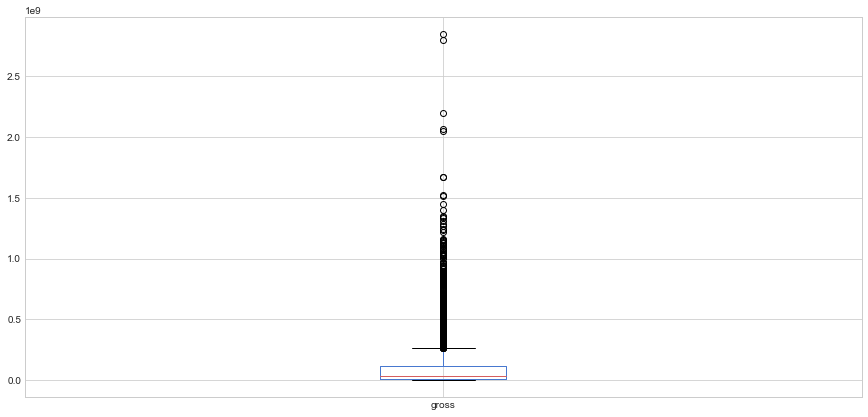

In [695]:
# Ordering data by new_data.gross
new_data = new_data.sort_values(by=['gross', 'name'], ascending=False)

# Checking for outliers in new_data.gross
new_data.boxplot(column='gross')


Text(0.5, 1.0, 'Correlation Between Digit Variables')

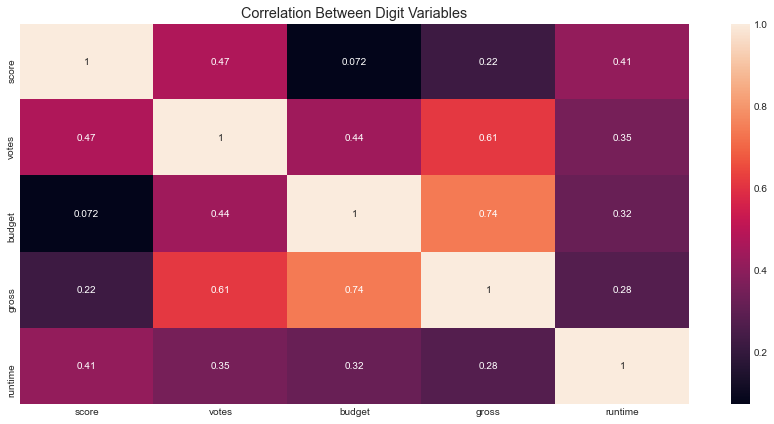

In [696]:
# Examining the correlation between digit variable in the dataset
sns.heatmap(data=new_data.corr(), annot=True)

plt.title('Correlation Between Digit Variables')


In [697]:
# Converting non-digit values into unique digits
coded_data = new_data.copy()
for col in coded_data.columns:
    if coded_data[col].dtype == 'object':
        coded_data[col] = coded_data[col].astype('category').cat.codes
coded_data

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_location,released_date,released_year
5445,386,4,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,47,496,29
7445,388,4,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,47,124,39
3045,4909,4,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,47,502,17
6663,3643,4,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,47,498,35
7244,389,4,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,47,132,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,5,6,5.8,3500,585,2924,1498,47,3000000,5073,1385,96,41,847,35
2434,2969,4,0,4.5,1900,1805,3102,186,47,5000000,2970,1376,97,39,1386,14
3681,1595,7,6,6.8,43000,952,1683,527,6,5000000,2554,466,108,8,1628,21
272,2909,5,9,3.9,2300,261,55,1473,47,800000,2270,582,85,47,1442,2


Text(0.5, 1.0, 'Correlation Matrix')

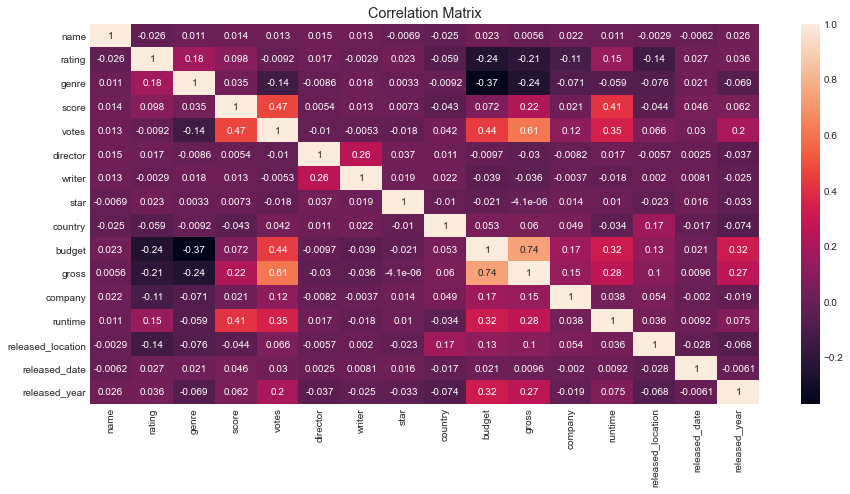

In [698]:
# Correlation matrix for the entire dataset
corr_matrix = coded_data.corr(method='pearson')

# Correlation matrix visualization
sns.heatmap(data=corr_matrix, annot=True)

plt.title('Correlation Matrix')


In [711]:
# Correlation pairs
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[(corr_pairs) != 1]
print(corr_pairs.to_string())

name               rating              -0.026315
                   genre                0.010996
                   score                0.014450
                   votes                0.012615
                   director             0.015246
                   writer               0.012880
                   star                -0.006882
                   country             -0.025490
                   budget               0.023392
                   gross                0.005639
                   company              0.021697
                   runtime              0.010850
                   released_location   -0.002908
                   released_date       -0.006155
                   released_year        0.025542
rating             name                -0.026315
                   genre                0.182092
                   score                0.098222
                   votes               -0.009217
                   director             0.016664
                   w

In [700]:
# Strong correlation pairs
strong_pairs = corr_pairs[abs(corr_pairs) >= 0.5]
print(strong_pairs)

votes   gross     0.614751
budget  gross     0.740247
gross   votes     0.614751
        budget    0.740247
dtype: float64


Text(0.5, 1.0, 'Budget vs Gross Earnings')

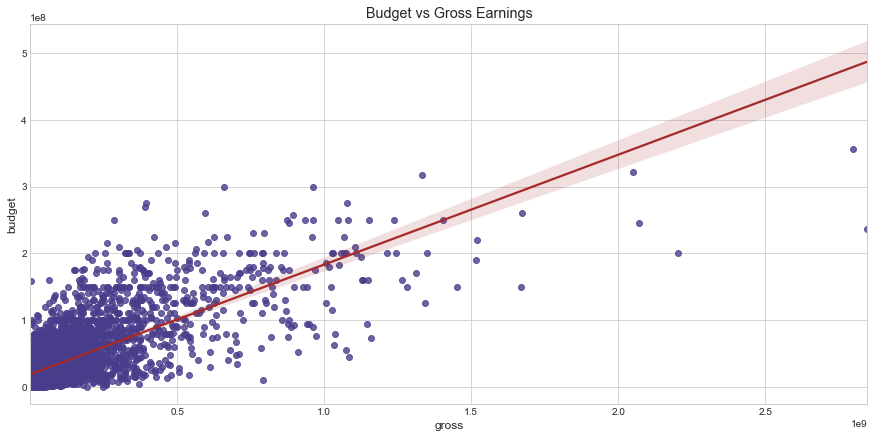

In [701]:
# Correlation between new_data.gross and new_data.budget
gross_budget_viz = sns.regplot(data=new_data, x='gross', y='budget', scatter_kws={
    'color': 'darkslateblue'}, line_kws={'color': 'brown'})

plt.title('Budget vs Gross Earnings')


### Insights
#### There are positive correlation between gross earnings and votes of 0.740247
#### > This means higher budget are strongly correlated with higher gross earnings

Text(0.5, 1.0, 'Votes vs Gross Earnings')

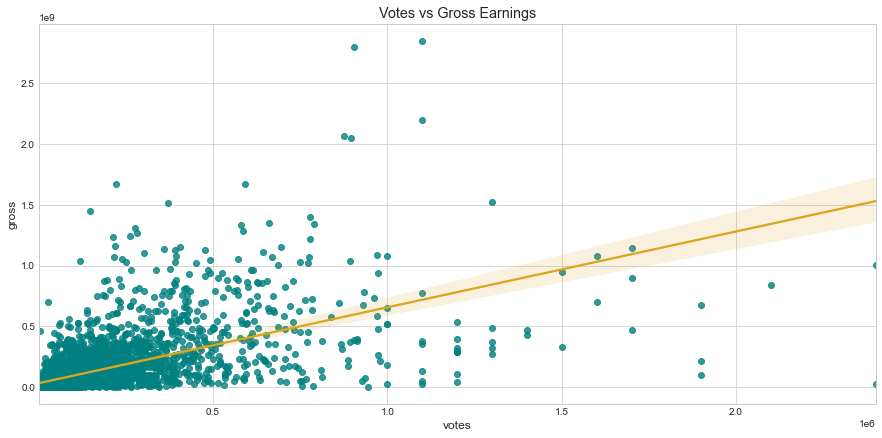

In [702]:
# Correlation between new_data.gross and new_data.votes
gross_votes_viz = sns.regplot(data=new_data, x='votes', y='gross', scatter_kws={
    'color': 'teal'}, line_kws={'color': 'goldenrod'})

plt.title('Votes vs Gross Earnings')


### Insights
#### There are positive correlation between gross earnings and votes of 0.614751
#### > This means higher number of votes are correlated with higher gross earnings


In [781]:
# Top companies by new_data.gross
gross_comp = new_data.groupby(['company']).gross.sum()
top_comp = gross_comp.sort_values(ascending=False)[:20]
top_comp_df = top_comp.to_frame().reset_index()

Text(0.5, 1.0, 'Top Companies by Gross Earnings')

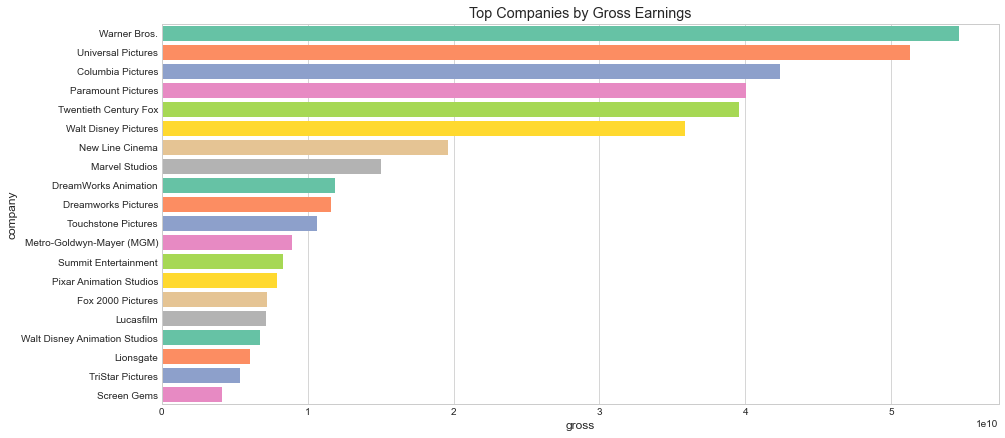

In [782]:
# 'Top Companies by Gross Earnings' visualization
top_comp_viz = sns.barplot(x='gross', y='company', data=top_comp_df, orient='h', saturation=1, palette='Set2')
plt.title('Top Companies by Gross Earnings')

## Breakdown: Net Profit

In [778]:
# Creating new Series net_profit and profit_to_budget 
new_data['net_profit'] = new_data['gross']-new_data['budget']
new_data['profit_to_budget'] = round(new_data['net_profit']/new_data['budget'], 2)

In [707]:
# Top movies by new_data.net_profit
top_movie = new_data.groupby(['name', 'company', 'genre', 'rating', 'budget', 'gross', 'profit_to_budget']
                             ).net_profit.mean().sort_values(ascending=False)[:20]
top_movie_df = top_movie.to_frame().reset_index()



,name,company,genre,rating,budget,gross,profit_to_budget,net_profit
0,Avatar,Twentieth Century Fox,Action,PG-13,237000000,2847246203,11.01,2610246203
1,Avengers: Endgame,Marvel Studios,Action,PG-13,356000000,2797501328,6.86,2441501328
2,Titanic,Twentieth Century Fox,Drama,PG-13,200000000,2201647264,10.01,2001647264
3,Star Wars: Episode VII - The Force Awakens,Lucasfilm,Action,PG-13,245000000,2069521700,7.45,1824521700
4,Avengers: Infinity War,Marvel Studios,Action,PG-13,321000000,2048359754,5.38,1727359754
5,Jurassic World,Universal Pictures,Action,PG-13,150000000,1670516444,10.14,1520516444
6,The Lion King,Walt Disney Pictures,Animation,PG,260000000,1670727580,5.43,1410727580
7,Furious 7,Universal Pictures,Action,PG-13,190000000,1515341399,6.98,1325341399
8,Frozen II,Walt Disney Animation Studios,Animation,PG,150000000,1450026933,8.67,1300026933
9,The Avengers,Marvel Studios,Action,PG-13,220000000,1518815515,5.90,1298815515


Text(0.5, 1.0, 'Net Profit by Genre')

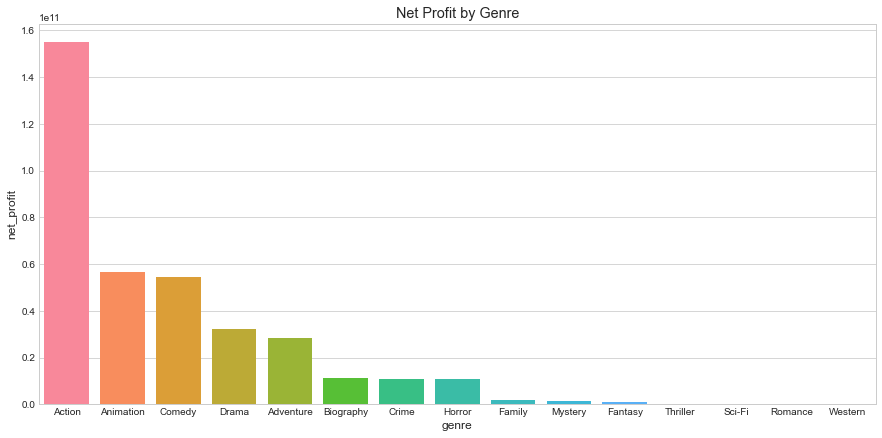

In [780]:
# Top genre by net_profit
top_genre = new_data.groupby(
    'genre').net_profit.sum().sort_values(ascending=False)
top_genre_df = top_genre.to_frame().reset_index()

# Visualization
sns.barplot(data=top_genre_df, x='genre', y='net_profit', saturation=1)
plt.title('Net Profit by Genre')


### Insights
#### The highest profit in movies belong in the action genre

Text(0.5, 1.0, 'Net Profit by Ratings')

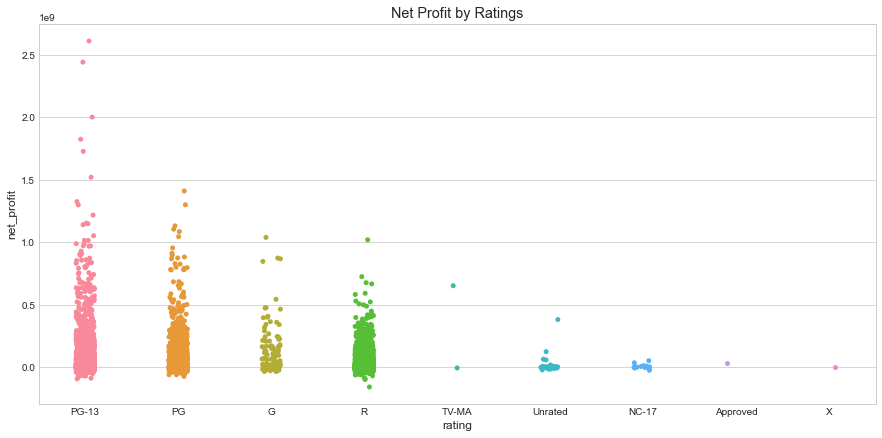

In [ ]:
# Net profit by ratings 
gross_ratings_viz = sns.stripplot(data=new_data, x='rating', y='net_profit')

plt.title('Net Profit by Ratings')

### Insights
#### The highest grossing movies are rated PG-13 and PG

## Breakdown: Profit-to-Budget Ratio

<AxesSubplot:>

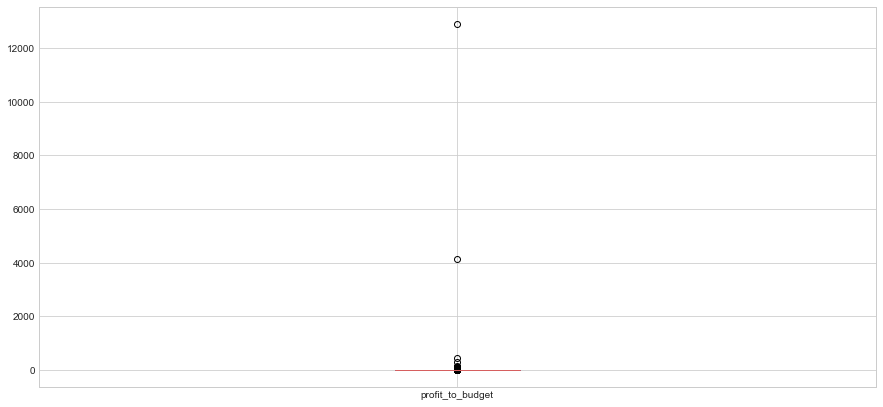

In [735]:
# Checking for outliers in profit_to_budget
new_data.boxplot(column='profit_to_budget')

In [774]:
# Top movies with profit-to-budget ratio
profitable = new_data.groupby(['name', 'company', 'genre', 'rating', 'budget', 'gross', 'net_profit']
                             ).profit_to_budget.mean().sort_values(ascending=False)

profitable_df = profitable.to_frame().reset_index()
profitable_df

,name,company,genre,rating,budget,gross,net_profit,profit_to_budget
0,Paranormal Activity,Solana Films,Horror,R,15000,193355800,193340800,12889.39
1,The Blair Witch Project,Haxan Films,Horror,R,60000,248639099,248579099,4142.98
2,The Gallows,New Line Cinema,Horror,R,100000,42964410,42864410,428.64
3,El Mariachi,Columbia Pictures,Action,R,7000,2040920,2033920,290.56
4,Once,Bórd Scannán na hÉireann,Drama,R,150000,20936722,20786722,138.58
...,...,...,...,...,...,...,...,...
5416,Hell's Kitchen,HK Film Corporation,Crime,R,6000000,11710,-5988290,-1.00
5417,Best Laid Plans,Dogstar Films,Crime,R,7000000,27816,-6972184,-1.00
5418,About Cherry,Enderby Entertainment,Drama,R,2500000,8315,-2491685,-1.00
5419,Tanner Hall,Two Prong Lesson,Drama,R,3000000,5073,-2994927,-1.00


In [775]:
# Dropping the outliers
profitable_df = profitable_df.drop([0,1], axis=0)


In [776]:
# Highest profit-to-budget ratio in movies by genre
profitable_genre = profitable_df.groupby(['genre']).profit_to_budget.mean().sort_values(ascending=False)

profitable_genre_df = profitable_genre.to_frame().reset_index()
print(profitable_genre_df)

        genre  profit_to_budget
0      Family         20.130000
1      Horror          8.884378
2    Thriller          3.300000
3   Animation          2.974477
4       Drama          2.708204
5      Comedy          2.636664
6   Adventure          2.128226
7      Action          1.938261
8     Mystery          1.805294
9   Biography          1.681833
10    Fantasy          1.447805
11      Crime          1.337494
12     Sci-Fi          0.995000
13    Western         -0.005000
14    Romance         -0.074000


In [777]:
# Highest profit-to-budget ratio in movies by genre and rating combination
profitable_combination = profitable_df.groupby(['genre', 'rating']).profit_to_budget.mean().sort_values(ascending=False)

profitable_combination_df = profitable_combination.to_frame().reset_index()
profitable_combination_df

,genre,rating,profit_to_budget
0,Family,PG,27.136667
1,Action,TV-MA,13.580000
2,Action,Unrated,11.230000
3,Horror,PG-13,10.496047
4,Horror,R,8.925897
...,...,...,...
57,Western,PG,-0.840000
58,Family,G,-0.890000
59,Fantasy,Unrated,-0.955000
60,Thriller,PG,-0.970000


### Insights
#### Movies with highest profit to budget ratio are PG-rated family movies